<p style="font-size:14px">
Em cenários acadêmicos, o desempenho dos alunos pode ser influenciado por diversos fatores, sendo as horas de estudo uma das mais óbvias. No entanto, o cansaço também pode ser um fator relevante, onde estudar por muitas horas seguidas pode resultar em uma menor eficiência, refletindo em notas mais baixas. Portanto, a proposta aqui é:
</p>

### Proposta 📋

<p style="font-size:14px">
1. Restringir o tempo máximo de estudo a 24 horas;<br>
2. Garantir que a nota final nunca ultrapasse o valor máximo de 100;<br>
3. Considerar se o aluno está "cansado" (0 para não cansado e 1 para cansado), o que impacta negativamente a nota.
</p>

### Observações 📋

<p style="font-size:14px">
1. Horas de Estudo: Um valor entre 0 e 24, onde quanto mais tempo o aluno estuda, maior a nota. No entanto, o efeito do estudo tem limites, e a produtividade começa a cair após um certo número de horas.<br> 
2. Cansado: Um valor binário (0 ou 1), onde "1" indica que o aluno está cansado, resultando em uma redução na nota final. <br>
3. O desempenho final (nota) é calculado com base nas horas de estudo, mas limitado ao valor máximo de 100. <br>
4. Se o aluno está cansado, a nota é reduzida. As notas são geradas com base em uma função linear, multiplicando as horas de estudo por um fator aleatório (para simular variações na eficiência), e se o aluno estiver cansado, subtraímos pontos da nota final.
</p>

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [104]:
# Considerando os valores em AULA:

In [105]:
# Gerar Seed:
np.random.seed()
n_samples = 365

# gerar Arrays:
horas_estudo = np.random.uniform(0,24,n_samples)
cansado = np.random.choice([0,1], n_samples)
nota = np.random.choice(range(0,100), n_samples)
#nota = np.minimum(horas_estudo * np.random.uniform(3, 5), 100) - (cansado * 10)

In [106]:
pd.Series(nota).sort_values()

178     0
54      0
324     0
12      0
315     1
       ..
227    99
74     99
326    99
360    99
39     99
Length: 365, dtype: int32

In [107]:
nota = np.clip(nota, 0, 100)

In [108]:
# Garantir os valores corretos
data = pd.DataFrame({
    'Horas de estudo': horas_estudo,
    'Cansado': cansado,
    'Nota':nota
})
data.head()

,Horas de estudo,Cansado,Nota
0,14.431948,1,10
1,18.247907,1,68
2,10.364024,0,52
3,7.818500,1,47
4,5.705613,1,80


In [109]:
hora_de_estudo = data['Horas de estudo'].values
valor_nota = data['Nota'].values

In [110]:
hora_de_estudo[:5]

array([14.43194847, 18.24790727, 10.36402385,  7.81850025,  5.70561259])

In [111]:

valor_nota[:5]

array([10, 68, 52, 47, 80])

In [112]:
# Criar uma lista de cores com base nos valores de 'Cansado'
cores = ['blue' if c == 0 else 'red' for c in data['Cansado'].values]
cores[:5]

['red', 'red', 'blue', 'red', 'red']

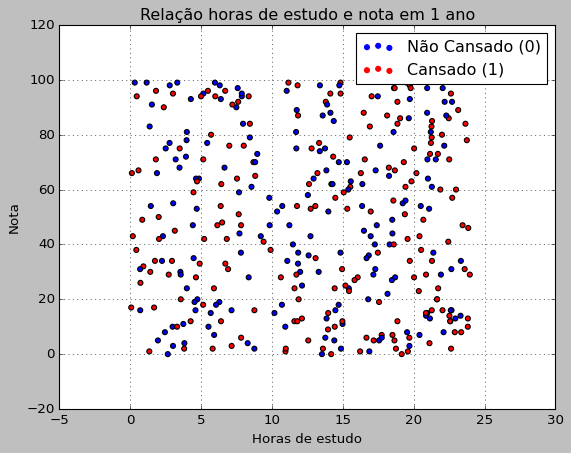

In [114]:
plt.style.use('classic')

# plot
fig, ax = plt.subplots()
ax.scatter(
    x=hora_de_estudo, 
    y=valor_nota,
    c=cores  # Usando as cores definidas
)

# Adicionar a legenda
# Utilizando os rótulos personalizados
ax.scatter([], [], color='blue', label='Não Cansado (0)')  # Exemplo para o valor 0
ax.scatter([], [], color='red', label='Cansado (1)')  # Exemplo para o valor 1

# Adicionar a legenda
plt.legend(loc='upper right')

plt.grid()
plt.xlabel('Horas de estudo')
plt.ylabel('Nota')
plt.title('Relação horas de estudo e nota em 1 ano')
plt.show()
